In [2]:
import pandas as pd
df1 = pd.read_excel(r'D:\ML\ts\git\usage_sample_ts.xlsx', sheet_name='case1')
df2 = pd.read_excel(r'D:\ML\ts\git\usage_sample_ts.xlsx', sheet_name='case2')

In [3]:
df1.head(2)

,Time,Load,Utilisation,Memory,/,/tmp,/mnt/vol1,/mnt/vol2,/run,Context Switches
0,2020-08-21 12:00:00,5.49,0.2851,0.7226,0.5964,0.0098,0.0562,0.1459,0.0174,undefined
1,2020-08-21 13:00:00,5.92,0.3939,0.7225,0.5964,0.0098,0.0562,0.1479,0.0174,undefined


In [4]:
df2.head(2)

,Time,Load,Utilisation,Memory,/,/tmp,/mnt/vol1,/mnt/vol2,/run,Context Switches
0,2020-08-21 12:00:00,3.20,0.3905,0.4210,0.2830,0.1226,0.3891,0.3431,0.1005,undefined
1,2020-08-21 13:00:00,4.24,0.4235,0.4343,0.2831,0.1226,0.3907,0.2961,0.1005,undefined


In [6]:
df1 = df1[['Time', 'Utilisation']]

In [7]:
df1.head()

,Time,Utilisation
0,2020-08-21 12:00:00,0.2851
1,2020-08-21 13:00:00,0.3939
2,2020-08-21 14:00:00,0.3680
3,2020-08-21 15:00:00,0.3309
4,2020-08-21 16:00:00,0.3136


In [8]:
df1['Time'] = pd.to_datetime(df1['Time'])

In [9]:
df1.set_index('Time', inplace=True)

In [10]:
df1.head()

,Utilisation
Time,
2020-08-21 12:00:00,0.2851
2020-08-21 13:00:00,0.3939
2020-08-21 14:00:00,0.3680
2020-08-21 15:00:00,0.3309
2020-08-21 16:00:00,0.3136


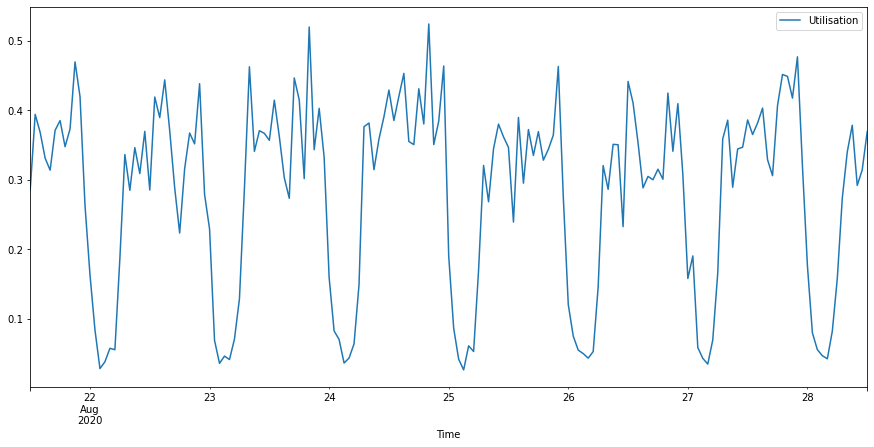

In [11]:
df1.plot(figsize=(15,7))

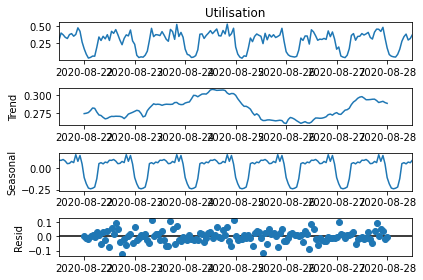

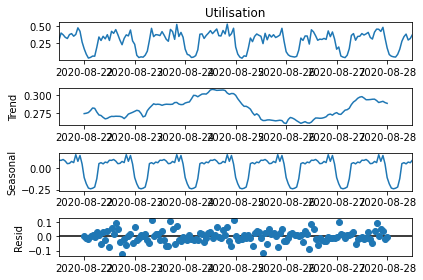

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df1['Utilisation'].dropna(), period=24)
decomposition.plot()

In [13]:
from statsmodels.tsa.stattools import adfuller

def adf_check(time_series):
    result =adfuller(time_series)
    print('---Augmented Dickey Fuller Test Result---')
    print('-----------------------------------------')
    print(f'ADF Test Statistic      : {result[0]}')
    print(f'P-Value                 : {result[1]}')
    print(f'Number of Lags          : {result[2]}')
    print(f'Number of Observations  : {result[3]}')
    print('-----------------------------------------')
    if result[1] <= 0.05:
        print('Time series is stationary')
    else:
        print('Time series is not stationary')

In [14]:
adf_check(df1['Utilisation'].dropna())

---Augmented Dickey Fuller Test Result---
-----------------------------------------
ADF Test Statistic      : -6.551873159781819
P-Value                 : 8.809745689338488e-09
Number of Lags          : 13
Number of Observations  : 155
-----------------------------------------
Time series is stationary


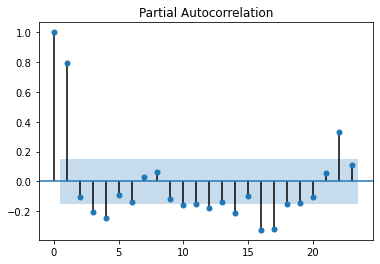

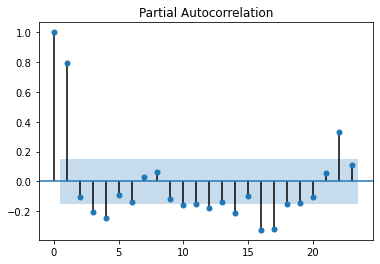

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_pacf(df1['Utilisation'].dropna())

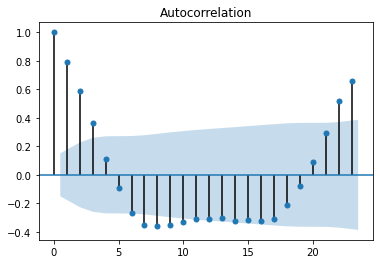

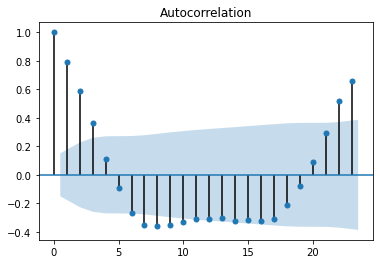

In [16]:
plot_acf(df1['Utilisation'].dropna())

In [17]:
df1['seasonal_difference'] = df1['Utilisation'] - df1['Utilisation'].shift(24)

In [18]:
adf_check(df1['seasonal_difference'].dropna())

---Augmented Dickey Fuller Test Result---
-----------------------------------------
ADF Test Statistic      : -4.266333030577649
P-Value                 : 0.0005077764379060569
Number of Lags          : 4
Number of Observations  : 140
-----------------------------------------
Time series is stationary


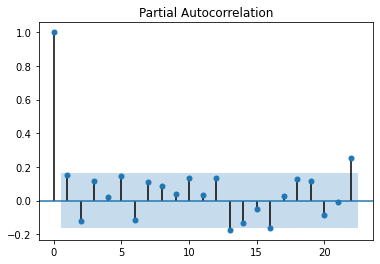

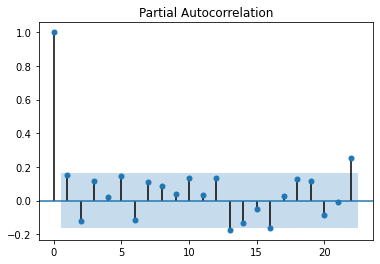

In [19]:
plot_pacf(df1['seasonal_difference'].dropna())

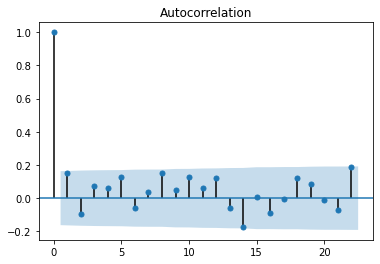

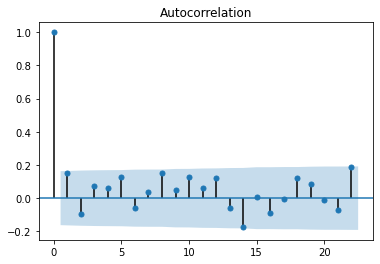

In [20]:
plot_acf(df1['seasonal_difference'].dropna())

In [21]:
import statsmodels.api as sm

sarima_model = sm.tsa.statespace.SARIMAX(df1['Utilisation'], order=(2, 1, 4), seasonal_order=(0, 1, 0, 24), enforce_invertibility=False, enforce_stationarity=False)

result_sarima = sarima_model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


In [22]:
pred_ts = pd.date_range(df1.index[-1], periods=25, freq='H')[1:]

In [23]:
df1.shape

(169, 2)

In [24]:
pred_df = pd.DataFrame(pred_ts, columns=['Time'])
pred_df.set_index('Time', inplace=True)

In [25]:
df1 = pd.concat([df1, pred_df])

In [26]:
df1.shape

(193, 2)

In [27]:
df1

,Utilisation,seasonal_difference
Time,,
2020-08-21 12:00:00,0.2851,NaN
2020-08-21 13:00:00,0.3939,NaN
2020-08-21 14:00:00,0.3680,NaN
2020-08-21 15:00:00,0.3309,NaN
2020-08-21 16:00:00,0.3136,NaN
...,...,...
2020-08-29 08:00:00,NaN,NaN
2020-08-29 09:00:00,NaN,NaN
2020-08-29 10:00:00,NaN,NaN


In [28]:
predicted_series = result_sarima.predict(start=0, end=192)

In [29]:
result_df = pd.concat([df1, pd.DataFrame(predicted_series)], ignore_index=True, axis=1)

In [30]:
result_df.head(2)

,0,1,2
2020-08-21 12:00:00,0.2851,NaN,0.00000
2020-08-21 13:00:00,0.3939,NaN,0.14459


In [31]:
result_df.columns = ['cpu_usage_actual', 'cup_usage_predicted']

ValueError: Length mismatch: Expected axis has 3 elements, new values have 2 elements

In [32]:
result_df.head(2)

,0,1,2
2020-08-21 12:00:00,0.2851,NaN,0.00000
2020-08-21 13:00:00,0.3939,NaN,0.14459


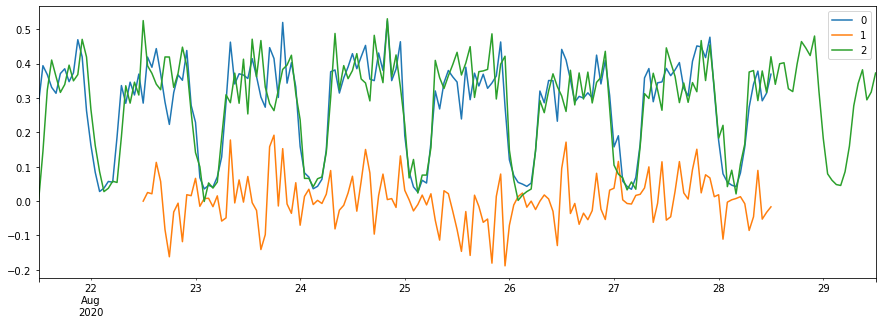

In [33]:
result_df.plot(figsize=(15,5))